<a href="https://colab.research.google.com/github/JLuceroVasquez/numpy-analisis-numerico-eficiente-con-python/blob/main/Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Numpy: Análisis numérico eficiente con Python**

NumPy es una biblioteca de Python que ofrece diversas herramientas y funcionalidades esenciales para la computación científica, incluyendo objetos de matriz multidimensional conocidos como *arrays*, rutinas para operaciones rápidas en matrizes, además de operaciones matemáticas, manipulación de formas, estadística entre otros. Es ampliamente utilizada en áreas como análisis de datos, procesamiento de señales y aprendizaje de máquina.

Para acceder a la documentación de esta biblioteca, puedes hacer clic en el siguiente enlace: https://numpy.org/devdocs/index.html

In [2]:
#Importamos numpy
import numpy as np

##Importamos los datos

###Importamos los datos desde GitHub
Mediante un enlace de un archivo cargado en un repositorio público, se importan los datos en un array de Numpy.

In [3]:
#Asignamos a una variable de alcance global el enlace URL donde se encuentra el archivo con los datos
url= 'https://raw.githubusercontent.com/JLuceroVasquez/numpy-analisis-numerico-eficiente-con-python/refs/heads/main/datos-manzanas.csv'

In [4]:
#En Numpy, es importante asegurar la homogenidad de tipo de datos.
#Tras examinar el archivo con los datos, se encontró que la primera columna (cuya posición es n° 0) contiene datos numéricos o datos vacíos.
#Por eso, se decidió crear un array de Numpy con el número de columnas que contenga únicamente datos numéricos de tipo float.

columna_inicial = 1
columna_final = (12*7+3)+1 #Resultado 87+1 = 88

columnas_numericas = np.arange(columna_inicial, columna_final, 1)

#Mediante el método "loadtxt" cargamos los datos en un array de Numpy.

datos = np.loadtxt(url, delimiter=',', usecols=columnas_numericas)

###Importamos los datos desde Google Drive
Conectando el cuaderno de GColab a GoogleDrive, y especificando la ruta donde se encuentra el archivo con los datos, se importan los datos en un array de Numpy.

In [5]:
#Importamos el módulo de funciones que nos permite conectarnos a nuestra cuenta de Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Asignamos a una variable de alcance global la ruta donde se encuentra del archivo de datos en GDrive
path = '/content/drive/MyDrive/Aprendizaje-vigente/Programa ONE/Ruta 5 - Aprendiendo a hacer ETL/1-numpy-analisis-numerico-con-python/datos-manzanas.csv'

In [7]:
#Aseguramos la homogeneidad de tipos, limitando el rango de columnas que se cargarán.
columna_inicial_2 = 1
columna_final_2 = 12*7+3

columnas_numericas_2 = np.arange(columna_inicial_2, columna_final_2, 1)

#Mediante el método "loadtxt" cargamos los datos en un array de Numpy.

datos_2 = np.loadtxt(path, delimiter=',', usecols=columnas_numericas_2)

##Métodos de arrays
Se exploraron los métodos: ndim, shape y transpose.

In [8]:
#Calculando las dimensiones del array creado.
datos.ndim

#Calculando la forma del array creado.
datos.shape

#Transponiendo el array creado.
datos_transpuestos = datos.T

##Ejercicios aula 1

In [9]:
#Ejercicio de opción múltiple
'''
Un colega te pidió que cargues una base de datos y verifiques el número de filas y columnas del archivo cargado.
Tenía dudas sobre si se habían cargado todas las filas.
¿Cómo determinar las dimensiones correctas de una matriz? Puedes usar la opción skiprows=1 para omitir la primera línea del archivo.
'''
url_2 = 'https://raw.githubusercontent.com/allanspadini/numpy/dados/bytebank.csv'
datos_ejercicio = np.loadtxt(url_2, delimiter = ",", skiprows= 1, dtype=float)
print(f'Las dimensiones del dataset son {datos_ejercicio.ndim}')
print(f'La forma del dataset es {datos_ejercicio.shape}')

Las dimensiones del dataset son 2
La forma del dataset es (12, 2)


In [10]:
#Ejercicio final del aula
'''
Vamos a utilizar otro conjunto de datos en un desafío que se desarrollará a lo largo del curso.
Este conjunto de datos es una versión modificada del archivo disponible en el sitio de Kaggle.
Por lo tanto, utilizaremos el archivo raw disponible en Github.
'''
#Asignamos la url del proyecto a una variable global
url_proyecto = 'https://gist.githubusercontent.com/ahcamachod/9be09de793dc3bf1e6c3d98eb4e5b1ef/raw/21b85572693200040e11284ef6dcfc3457ec8e11/citrus.csv'

#Omitimos la primera columna
columna_inicial_proyecto = 1
columna_final_proyecto = 5+1

columnas_numericas_proyecto = np.arange(columna_inicial_proyecto, columna_final_proyecto, 1)

#Cargamos el dataset en un array de Numpy
datos_proyecto = np.loadtxt(url_proyecto, delimiter = ",", usecols= columnas_numericas_proyecto, skiprows= 1)

##Visualización y selección
Se filtran columnas del array transpuesto para aislar los precios por cada ciudad, y se crea una secuencia numérica para representar las fechas. Ambos arrays nuevos se grafican con Maplotlib para mostrar la evolución histórica de los precios de manzanas en 4 ciudades rusas.

In [11]:
#Se genera una secuencia numérica para representar las fechas.

fechas = np.arange(1,88,1)

#Se usa slice notion para filtrar los precios por cada ciudad.
precios_moscu = datos_transpuestos[:,1]
precios_kaliningrado = datos_transpuestos[:,2]
precios_petersburgo = datos_transpuestos[:,3]
precios_kasnodar = datos_transpuestos[:,4]
precios_ekaterimburgo = datos_transpuestos[:,5]

#Creamos una diccionario con el nombre de las ciudades y sus array de precios
ciudades = {
    'Moscú': precios_moscu,
    'Kaliningrado': precios_kaliningrado,
    'Petersburgo': precios_petersburgo,
    'Kasnodar': precios_kasnodar,
    'Ekaterimburgo': precios_ekaterimburgo
}

In [12]:
#Importamos los módulos para documentar y ejecutar la función que graficará la evolución histórica de los precios.
import matplotlib.pyplot as plt #Para ejecutar la función myplotter
import matplotlib.axes #Para documentar la función myplotter
from typing import Dict, Any, Optional #Para documentar la función myplotter, asegurando la compatibilidad con versiones anteriores a Python 3.9 que no soportan dict[str, Any]

In [13]:
#Definimos una función para generar los gráficos rápidamente
def my_plotter(ax: matplotlib.axes.Axes, data1: Optional[np.ndarray] = None, data2: Optional[np.ndarray] = None, param_dict: Optional[Dict[str, Any]] = None) -> list:
	"""
	Función que dibuja un gráfico en el objeto ax usando la data1 y data2, aplicando estilos personalizados.

	ax: matplotlib.axes.Axes
		Ojeto de ejes de Maptloplib donde se dibuja el gráfico.
	data1: Optional[np.ndarray], default None
		Objeto array de Numpy donde se almacenan los datos de X.
	data2: Optional[np.ndarray], default None
		Objeto array de Numpy donde se almacenan los datos de Y.
	param_dict: Optional[Dict[str, Any]], default None
		Diccionario cuyas claves son string y admite valores de cualquier tipo, y almacena los estilos personalizados del gráfico.
	return = grafico: list
		Lista de objetos Line2D creados por ax.plot().
	"""
	if param_dict is None:
		param_dict = {}

	if data1 is None or data2 is None:
		raise ValueError("Debe especificar un valor para data 1 y data 2")

	grafico = ax.plot(data1, data2, **param_dict)

	return grafico

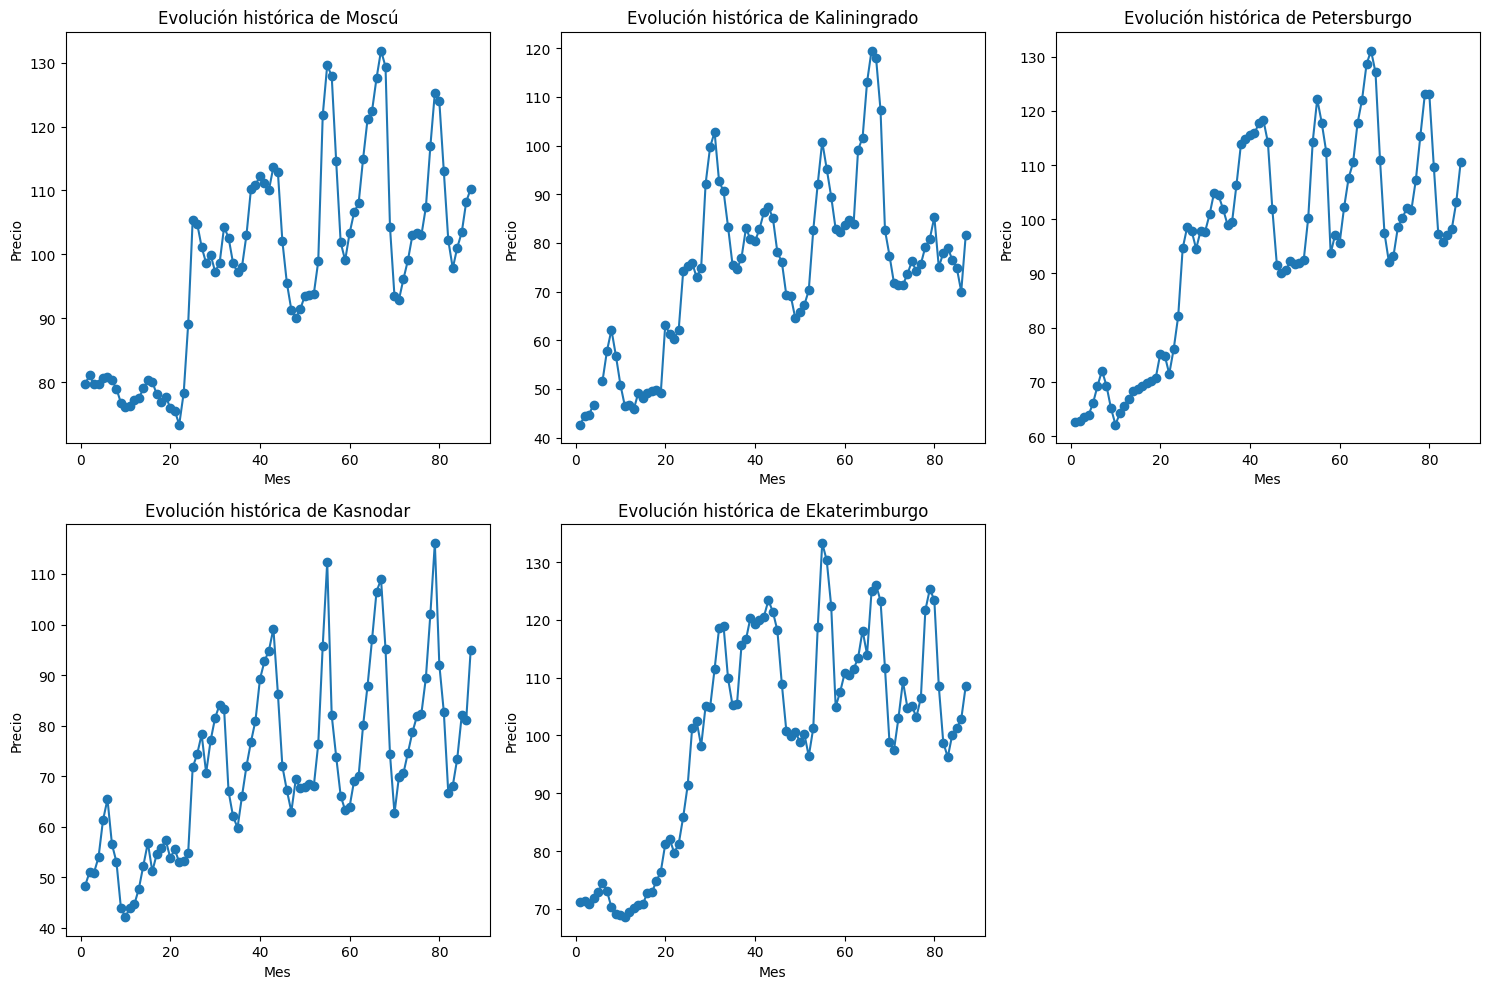

In [14]:
#Creamos una figura con seis ejes (2 filas y 3 columnas)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

#Aplanamos los ejes para iterar sobre ellos
axs = axs.flatten()

#Ejecutamos la función "my_plotter" iterando sobre los ejes y diccionario de ciudades
for i in range(5):
  my_plotter(axs[i], fechas, ciudades[list(ciudades.keys())[i]], {'marker': 'o'})
  '''
  ciudades.keys() devuelve un objeto con todas las claves del diccionario ciudades.
  Con list() convertimos ese objeto en una lista, sobre la que iteramos con el bucle for.
  Tras acceder a la i-ésima ciudad de esa lista, usamos esa ciudad como clave para obtener el valor asociado (ej. precios_moscu).
  '''
  axs[i].set_title(f'Evolución histórica de {list(ciudades.keys())[i]}')
  axs[i].set_xlabel('Mes')
  axs[i].set_ylabel('Precio')

#Quitamos el eje inutilizado
fig.delaxes(axs[5]) #Alternativa de: axs[5].axis('off')

#Mostramos la figura
plt.tight_layout() #Evita que ejes y títulos se solapen.
plt.show()

##Comparación entre arrays
Además de visualizar dentro de un gráfico, las tendencias anuales de precios de manzanas en Moscú. Se emplearon las funciones numpy.array_equal y numpy.allclose para corroborar la igualdad o semejanza entre los precios de diferentes años para una misma ciudad (Moscu).

In [15]:
precios_moscu.shape

(87,)

In [16]:
#Creamos una serie numérica para representar los 12 meses del año.
meses = np.arange(1,13,1)

#Separamos los precios de manzanas en moscú del 2013 al 2016.
precios_moscu_2013 = precios_moscu[0:12]
precios_moscu_2014 = precios_moscu[12:24]
precios_moscu_2015 = precios_moscu[24:36]
precios_moscu_2016 = precios_moscu[36:48]

#Creamos un diccionario cuyas claves son los años, y los valores son los array de precios.
precios_anuales_moscu = {
    '2013': precios_moscu_2013,
    '2014': precios_moscu_2014,
    '2015': precios_moscu_2015,
    '2016': precios_moscu_2016,
}

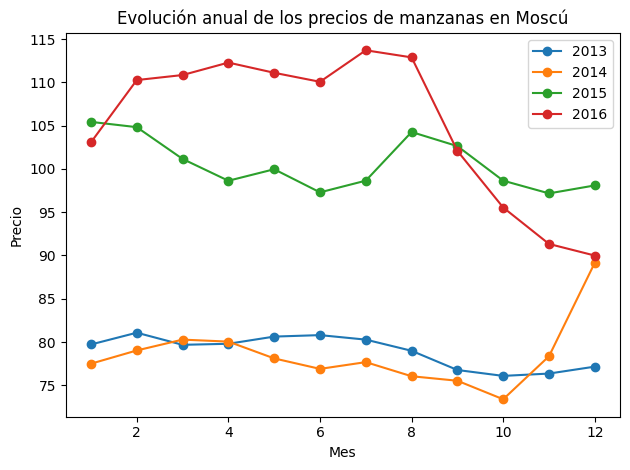

In [17]:
#Iteramos el método plot 4 veces para graficar los precios de manzanas en Moscú.
for i in range(4):
  plt.plot(meses,precios_anuales_moscu[list(precios_anuales_moscu.keys())[i]],marker="o")

#Añadimos el título del gráfico, los títulos de los ejes y la leyenda personalizada.
plt.title("Evolución anual de los precios de manzanas en Moscú")
plt.xlabel("Mes")
plt.ylabel("Precio")
plt.legend(list(precios_anuales_moscu.keys()))

#Mostramos el gráfico
plt.tight_layout()
plt.show()

In [18]:
#Comprobamos la similitud entre los precios del 2013 y 2014.
similitud = np.array_equal(precios_moscu_2013, precios_moscu_2014)

#Comprobamos la similitud entre los precios del 2013 y 2014, tolerando una diferencia de 5 rublos rusos.
semejanza = np.allclose(precios_moscu_2013, precios_moscu_2014,5)

#Imprimimos los resultados
print(f'En el 2013 y 2014, ¿Los precios fueron iguales? {similitud}\nEn el 2013 y 2014, ¿Los precios eran similares en +/-5 rublos? {semejanza}')

En el 2013 y 2014, ¿Los precios fueron iguales? False
En el 2013 y 2014, ¿Los precios eran similares en +/-5 rublos? True


##Tratamiento de Nan
La presencia de valores nulos (nan) contaminan los resultados al operar vectores. Entonces, si existe un precio nulo en el array de una ciudad, la media obtenida con np.mean serán también nan. Para resolver esto, se debe usar la interpolación para reemplazar los valores nulos con promedios de valores adyacentes.

In [19]:
#Al promediar los precios de kaliningrado, se obtiene un resultado nulo debido a la presencia de nulos.
np.mean(precios_kaliningrado)


np.float64(nan)

In [20]:
#Una solución es usar una función que omita los nulos en el cálculo.
promedio_nan_kaliningrado = np.nanmean(precios_kaliningrado)
promedio_nan_kaliningrado

np.float64(74.84581395348837)

In [21]:
precios_kaliningrado.shape[0]

87

In [22]:
#Otra solución es usar una función que mediante la interpolación reemplace los valores nulos por el promedio de valores adyacentes o el promedio total sin nulos.
def interpolar_promedios(data: np.ndarray, promedio_nan: float=0) -> np.ndarray:
  """
  Función que mediante la interpolación reemplaza los valores nulos por el promedio de valores adyacentes o el promedio total sin nulos.

  data: np.ndarray
    Objeto array unidimensional de Numpy donde se almacenan los datos.
  promedio_nan: float, default 0
    Numero de tipo float que representa el promedio de los datos, omitiendo los valores nulos.
  return = data_interpolada: np.ndarray
    Objeto array unidimensional de Numpy donde se almacenan los datos interpolados.
  """
  #Obtenemos el tamaño del array unidimensional, ya sea a partir del número de filas o el número de columnas.
  try:
    tamano_data = data.shape[0]
  except IndexError:
    tamano_data = data.shape[1]

  #Iteramos con un bucle for en el array unidimensional, según la condición cumplida, se reemplazan los valores nulos.
  for i in range(tamano_data):
    if np.isnan(data[0]):
        data[0] = promedio_nan
    elif np.isnan(data[i]) and np.isnan(data[i+1]):
        data[i] = promedio_nan
    elif np.isnan(data[i]) and not np.isnan(data[i+1]):
        data[i] = (data[i-1]+data[i+1])/2

  #Se asigna la data transformada a una nueva variable llamada "data_interpolada", que será devuelta por la función.
  data_interpolada = data

  return data_interpolada

In [23]:
#Se ejecuta la función creada para interpolar los promedios en el array de Kaliningrado.
precios_kaliningrado_interpolado = interpolar_promedios(precios_kaliningrado, promedio_nan_kaliningrado)

#Se ejecuta nuevamente el método np.mean para obtener el promedio correspondiente al precio de manzanas en Kaliningrado.
np.mean(precios_kaliningrado_interpolado)

np.float64(74.5506896551724)

##Ejercicio del aula 2
Continuando con el proyecto de las naranjas/toronjas, ahora debes seleccionar parte de los datos. Las columnas que evaluaremos son el diámetro y el peso. Crea arrays específicos para almacenar el diámetro y el peso de la naranja y la toronja. El diámetro está en la columna cero y el peso en la columna uno. Los datos de las naranjas van hasta la fila 4999 y los datos de las toronjas comienzan en la fila 5000 del archivo.

Después de seleccionar los datos, importa la biblioteca matplotlib y crea un gráfico para el peso en función del diámetro tanto para las naranjas como para las toronjas.

In [24]:
#Conocemos las dimensiones y formas del dataset
datos_proyecto.ndim #Resultado: 2
datos_proyecto.shape

(10000, 5)

In [25]:
datos_proyecto[:5,:]

array([[  2.96,  86.76, 172.  ,  85.  ,   2.  ],
       [  3.91,  88.05, 166.  ,  78.  ,   3.  ],
       [  4.42,  95.17, 156.  ,  81.  ,   2.  ],
       [  4.47,  95.6 , 163.  ,  81.  ,   4.  ],
       [  4.48,  95.76, 161.  ,  72.  ,   9.  ]])

In [26]:
#Seleccionamos con slice notation los datos que se usarán.
diametro_naranjas = datos_proyecto[:5000,0]
diametro_toronjas = datos_proyecto[5000:,0]
peso_naranjas = datos_proyecto[:5000,1]
peso_toronjas = datos_proyecto[5000:,1]

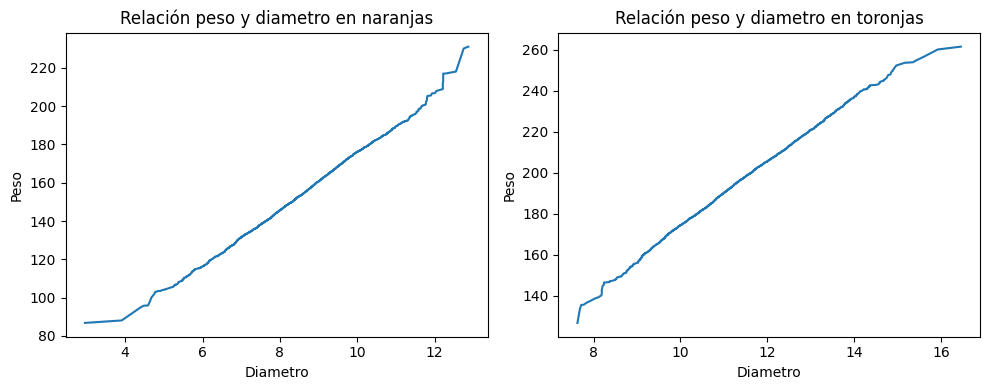

In [27]:
#Creamos una figura con dos ejes (1 fila y 2 columnas)
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

#Ejecutamos la función "my_plotter" para los datos de naranjas.
my_plotter(axs[0], diametro_naranjas, peso_naranjas)
axs[0].set_title(f'Relación peso y diametro en naranjas')
axs[0].set_xlabel('Diametro')
axs[0].set_ylabel('Peso')

#Ejecutamos la función "my_plotter" para los datos de toronjas.
my_plotter(axs[1], diametro_toronjas, peso_toronjas)
axs[1].set_title(f'Relación peso y diametro en toronjas')
axs[1].set_xlabel('Diametro')
axs[1].set_ylabel('Peso')

#Mostramos la figura
plt.tight_layout() #Evita que ejes y títulos se solapen.
plt.show()

##Diferencia entre Arrays
Se estimará tendencias con líneas rectas y, para cuantificar las diferencias entre datos reales y estimaciones, se calculará la raíz cuadrada de la suma de las diferencias al cuadrado buscando el mejor ajuste posible.

La tendencia se estimó con la ecuación de la recta **Y = a.X + b**

In [28]:
#Nombramos como X al array fechas.
X = fechas
Y_original = precios_moscu

#Calculamos las estimaciones a partir de parámetros aleatorios. Trabajaremos con dos ecuaciones.
Y1_estimada = 1.5*X + 78
Y2_estimada = 0.5*X + 78

In [29]:
#Realizamos el cálculo manual de la raíz cuadrada de la suma de las diferencias al cuadrado.
Error_1 = np.sqrt(np.sum(np.power((Y_original - Y1_estimada),2)))
Error_2 = np.sqrt(np.sum(np.power((Y_original - Y2_estimada),2)))

print(f'Para la estimación 1, se calculó un error de {Error_1}.\nPara la estimación 2, se calculó un error de {Error_2}')

Para la estimación 1, se calculó un error de 500.33320307571034.
Para la estimación 2, se calculó un error de 103.53131941591394


In [30]:
#Realizamos el cálculo corto de la raíz cuadrada de la suma de las diferencias al cuadrado.
Error_1_corto = np.linalg.norm(Y_original - Y1_estimada)
Error_2_corto = np.linalg.norm(Y_original - Y2_estimada)
print(f'Para la estimación 1, se calculó un error de {Error_1_corto}.\nPara la estimación 2, se calculó un error de {Error_2_corto}')

Para la estimación 1, se calculó un error de 500.33320307571034.
Para la estimación 2, se calculó un error de 103.53131941591394


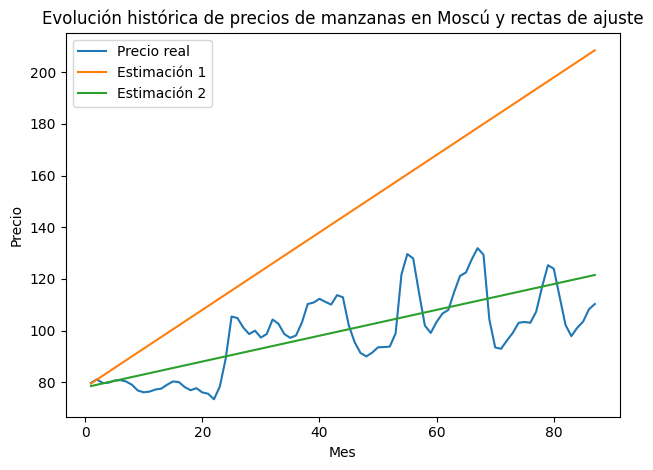

In [31]:
#Graficamos los datos y estimaciones como líneas.
plt.plot(X, Y_original)
plt.plot(X, Y1_estimada)
plt.plot(X, Y2_estimada)

#Añadimos el título, las etiquetas y la leyenda del gráfico.
plt.title(f'Evolución histórica de precios de manzanas en Moscú y rectas de ajuste')
plt.xlabel('Mes')
plt.ylabel('Precio')
plt.legend(['Precio real','Estimación 1','Estimación 2'])

#Mostramos la figura
plt.tight_layout() #Evita que ejes y títulos se solapen.
plt.show()

##Regresión lineal
La forma general de una recta en regresión lineal simple es:
$$
y = \alpha x + \beta
$$
Donde:
* y es la variable dependiente (respuesta)
* x es la variable independiente (predictora)
* α es la pendiente (inclinación)
* β es el intercepto (ordenada al origen)

###Función de mínimos cuadrados (error cuadrático total)
Buscamos minimizar el error cuadrático entre los valores reales y los estimados por la recta:

$$
\min_{\alpha, \beta} \sum_{i=1}^{n} \left( y_i - (\alpha x_i + \beta) \right)^2
$$

Es decir: *minimizar la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos.*

###Fórmulas para la pendiente y el intercepto
Pendiente(α):

$$
\alpha = \frac{n \sum x_i y_i - \sum x_i \sum y_i}{n \sum x_i^2 - (\sum x_i)^2}
$$

Intercepto (β):

$$
\beta = \frac{\sum y_i - \alpha \sum x_i}{n}
$$

In [32]:
#Nombramos los elementos que se usarán en las fórmulas.
y = precios_moscu
x = fechas
n = fechas.shape[0]

In [33]:
#Calculamos la pendiente.
a = (n*np.sum(x*y)-np.sum(x)*np.sum(y))/(n*np.sum(x**2)-np.sum(x)**2)

In [34]:
#Calculamos el intercepto.
b = np.mean(y) - a*np.mean(x)

In [35]:
#Calculamos las prediciones de precios de manzana.
y_predicho = x*a + b

#Calculamos el error cuadrático total de forma corta.
error_total = np.linalg.norm(y - y_predicho)

print(f'La fórmula es "x* {a:.2f} + {b:.2f}" y el error cuadrático total es +/- {error_total:.2f} rublos.')

La fórmula es "x* 0.44 + 79.65" y el error cuadrático total es +/- 101.80 rublos.


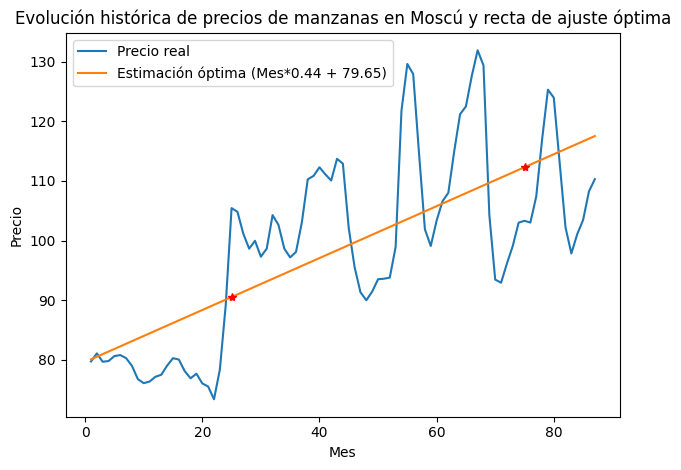

In [38]:
#Graficamos los datos y estimaciones como líneas.
plt.plot(x, y)
plt.plot(x, y_predicho)
plt.plot(25, 25*a+b, marker="*", color="r") #Se grafica la predicción para el mes 25.
plt.plot(75, 75*a+b, marker="*", color="r") #Se grafica la predicción para el mes 75.

#Añadimos el título, las etiquetas y la leyenda del gráfico.
plt.title(f'Evolución histórica de precios de manzanas en Moscú y recta de ajuste óptima')
plt.xlabel('Mes')
plt.ylabel('Precio')
plt.legend(['Precio real','Estimación óptima (Mes*0.44 + 79.65)'])

#Mostramos la figura
plt.tight_layout() #Evita que ejes y títulos se solapen.
plt.show()

##Ejercicio del aula 2
Continuando con el proyecto de las naranjas/toronjas, ahora debes calcular el coeficiente angular y lineal para la recta de las naranjas y para la recta de las toronjas. Utiliza la fórmula de mínimos cuadrados para encontrar cada uno.

In [40]:
#Se nombran los elementos que usaremos en el cálculo de la recta para las naranjas.
y_naranjas = peso_naranjas
x_naranjas = diametro_naranjas
n_naranjas = diametro_naranjas.shape[0]

#Se nombran los elementos que usaremos en el cálculo de la recta para las toronjas.
y_toronjas = peso_toronjas
x_toronjas = diametro_toronjas
n_toronjas = diametro_toronjas.shape[0]

###Fórmulas para la pendiente y el intercepto
Pendiente(α):

$$
\alpha = \frac{n \sum x_i y_i - \sum x_i \sum y_i}{n \sum x_i^2 - (\sum x_i)^2}
$$

Intercepto (β):

$$
\beta = \frac{\sum y_i - \alpha \sum x_i}{n}
$$

In [41]:
#Se caculan los parámetros para la recta de las naranjas.
a_naranjas= (n_naranjas*np.sum(x_naranjas*y_naranjas)-np.sum(x_naranjas)*np.sum(y_naranjas))/(n_naranjas*np.sum(x_naranjas**2)-np.sum(x_naranjas)**2)
b_naranjas= np.mean(y_naranjas) - a_naranjas*np.mean(x_naranjas)

#Se caculan los parámetros para la recta de las toronjas.
a_toronjas= (n_toronjas*np.sum(x_toronjas*y_toronjas)-np.sum(x_toronjas)*np.sum(y_toronjas))/(n_toronjas*np.sum(x_toronjas**2)-np.sum(x_toronjas)**2)
b_toronjas= np.mean(y_toronjas) - a_toronjas*np.mean(x_toronjas)

In [43]:
#Se calculan las estimaciones de peso a partir del diametro para naranjas y toronjas.
y_predicho_naranjas = x_naranjas*a_naranjas + b_naranjas
y_predicho_toronjas = x_toronjas*a_toronjas + b_toronjas

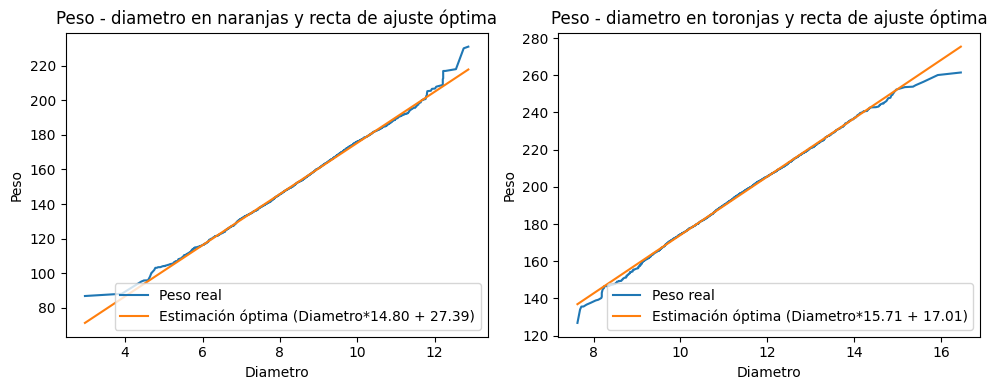

In [48]:
#Creamos una figura con dos ejes (1 fila y 2 columnas)
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

#Ejecutamos la función "my_plotter" para los datos de naranjas.
my_plotter(axs[0], x_naranjas, y_naranjas)
my_plotter(axs[0], x_naranjas, y_predicho_naranjas)
axs[0].set_title(f'Peso - diametro en naranjas y recta de ajuste óptima')
axs[0].set_xlabel('Diametro')
axs[0].set_ylabel('Peso')
axs[0].legend(['Peso real',f'Estimación óptima (Diametro*{a_naranjas:.2f} + {b_naranjas:.2f})'], loc=4)

#Ejecutamos la función "my_plotter" para los datos de toronjas.
my_plotter(axs[1], x_toronjas, y_toronjas)
my_plotter(axs[1], x_toronjas, y_predicho_toronjas)
axs[1].set_title(f'Peso - diametro en toronjas y recta de ajuste óptima')
axs[1].set_xlabel('Diametro')
axs[1].set_ylabel('Peso')
axs[1].legend(['Peso real',f'Estimación óptima (Diametro*{a_toronjas:.2f} + {b_toronjas:.2f})'], loc=4)

#Mostramos la figura
plt.tight_layout() #Evita que ejes y títulos se solapen.
plt.show()